In [ ]:
!gdalwarp -cutline E:\MODIS\Marco_EVI.shp -crop_to_cutline -of ENVI E:\MODIS\classes.tif E:\MODIS\classes_rec.img

In [2]:
%matplotlib inline

In [3]:
import rasterio
import numpy as np
from rasterstats import zonal_stats

#Hemos recortado previamente los rasters con el mismo marco para que tengan las mismas dimensiones
modis = r'E:\MODIS\evi_rec.img'
classes = r'E:\MODIS\classes_rec.img'
shape = r'E:\MODIS\rosarito.shp'

#Abrimos los rasters con rasterio como arrays
with rasterio.open(modis) as srcM:
    #transforM = srcM.meta['transform']
    MODIS = srcM.read()

with rasterio.open(classes) as srcc:
    CLASS = srcc.read()
    
#enmascaramos los rasters con cada uno de los embalses
#vdcns = MODIS[CLASS == 1]


In [4]:
import re, time, datetime

File = r'E:/MODIS/dates.txt'
fechas = []
dates = open(File, 'r')
for i in dates:
    date = (re.split(r'MOD13Q1.A\d{0}',i)[1][:7])
    #print(date)
    fecha = time.strptime(date[:4] + " " + date[4:], '%Y %j')
    year = fecha.tm_year
    month = fecha.tm_mon
    day = fecha.tm_mday

    fechas.append(datetime.datetime(year, month, day))

In [10]:
import os
import pandas as pd

embalses = {1: 'Santa Teresa', 2: 'Gabriel y Galan', 3: 'Rosarito' , 4: 'Navalcan', 5: 'Valdecanas',
             6: 'Azutan', 7: 'Alcantara', 8: 'Cijara'}

d = {}


path = r'E:\MODIS\stats'

mean = []
median = []
maxi = []
mini = []
per10 = []
per90 = []



for i in range(len(MODIS)):

    emb = MODIS[i][CLASS[0] == 6]

    median.append(np.median(emb))
    mean.append(emb.mean())
    maxi.append(emb.max())
    mini.append(emb.min())
    per10.append(np.percentile(emb, 10))
    per90.append(np.percentile(emb, 90))

d['median'] = median
d['mean'] = mean
d['min'] = mini
d['max'] = maxi
d['per10'] = per10
d['per90'] = per90
d['dates'] = fechas


Azutan = pd.DataFrame(d, index = pd.DatetimeIndex(fechas))
Azutan.to_csv(r'E:\MODIS\stats\Azutan.csv')

In [17]:
Azutan = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Azutan.xlsx')
Valdecanas = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Valdecanas.xlsx')
Alcantara = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Alcantara.xlsx')
Cijara = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Cijara.xlsx')
Navalcan = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Navalcan.xlsx')
Rosarito = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Rosarito.xlsx')
GabrielyGalan = pd.read_excel(r'E:\VDCNS\Efluentes\excel\GabrielyGalan.xlsx')
SantaTeresa = pd.read_excel(r'E:\VDCNS\Efluentes\excel\SantaTeresa.xlsx')

In [16]:
aa = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Azutan.xlsx')
aa['max'].mean()

1743.0923913043478

In [18]:
Mean = pd.DataFrame({'Valdecanas':Valdecanas['mean'], 'Azutan':Azutan['mean'], 'Cijara':Cijara['mean'], 
                  'Navalcan':Navalcan['mean'], 'Alcantara':Alcantara['mean'], 'SantaTeresa':SantaTeresa['mean'],
                  'Rosarito':Rosarito['mean'], 'GabrielyGalan':GabrielyGalan['mean']}, index = pd.DatetimeIndex(fechas))

Mean.to_excel(r'E:\VDCNS\Efluentes\excel\Mean.xlsx')

Median = pd.DataFrame({'Valdecanas':Valdecanas['median'], 'Azutan':Azutan['median'], 'Cijara':Cijara['median'], 
                  'Navalcan':Navalcan['median'], 'Alcantara':Alcantara['median'], 'SantaTeresa':SantaTeresa['median'],
                  'Rosarito':Rosarito['median'], 'GabrielyGalan':GabrielyGalan['median']}, index = pd.DatetimeIndex(fechas))
Median.to_excel(r'E:\VDCNS\Efluentes\excel\Median.xlsx')

Max = pd.DataFrame({'Valdecanas':Valdecanas['max'], 'Azutan':Azutan['max'], 'Cijara':Cijara['max'], 
                  'Navalcan':Navalcan['max'], 'Alcantara':Alcantara['max'], 'SantaTeresa':SantaTeresa['max'],
                  'Rosarito':Rosarito['max'], 'GabrielyGalan':GabrielyGalan['max']}, index = pd.DatetimeIndex(fechas))
Max.to_excel(r'E:\VDCNS\Efluentes\excel\Max.xlsx')

Per10 = pd.DataFrame({'Valdecanas':Valdecanas['per10'], 'Azutan':Azutan['per10'], 'Cijara':Cijara['per10'], 
                  'Navalcan':Navalcan['per10'], 'Alcantara':Alcantara['per10'], 'SantaTeresa':SantaTeresa['per10'],
                  'Rosarito':Rosarito['per10'], 'GabrielyGalan':GabrielyGalan['per10']}, index = pd.DatetimeIndex(fechas))
Per10.to_excel(r'E:\VDCNS\Efluentes\excel\Per10.xlsx')

Per90 = pd.DataFrame({'Valdecanas':Valdecanas['per90'], 'Azutan':Azutan['per90'], 'Cijara':Cijara['per90'], 
                  'Navalcan':Navalcan['per90'], 'Alcantara':Alcantara['per90'], 'SantaTeresa':SantaTeresa['per90'],
                  'Rosarito':Rosarito['per90'], 'GabrielyGalan':GabrielyGalan['per90']}, index = pd.DatetimeIndex(fechas))
Per90.to_excel(r'E:\VDCNS\Efluentes\excel\Per90.xlsx')

Min = pd.DataFrame({'Valdecanas':Valdecanas['min'], 'Azutan':Azutan['min'], 'Cijara':Cijara['min'], 
                  'Navalcan':Navalcan['min'], 'Alcantara':Alcantara['min'], 'SantaTeresa':SantaTeresa['min'],
                  'Rosarito':Rosarito['min'], 'GabrielyGalan':GabrielyGalan['min']}, index = pd.DatetimeIndex(fechas))
Min.to_excel(r'E:\VDCNS\Efluentes\excel\Min.xlsx')


# Comparativa del nivel Medio del EVI para el periodo  2000-2016

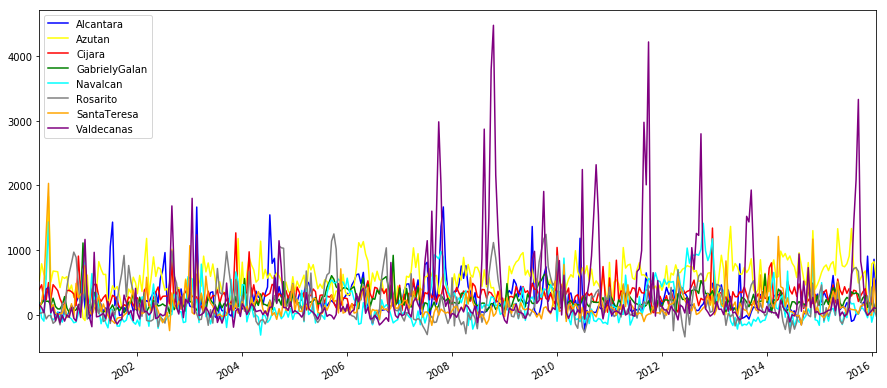

In [20]:
Mean.plot(figsize = (15,7), linewidth=1.5, color = ['blue', 'yellow', 'red', 'green', 'cyan', 'grey', 'orange', 'purple']);

### Comparativa del EVI 2000-2016 pero sólo de los 3 embalses del Tajo

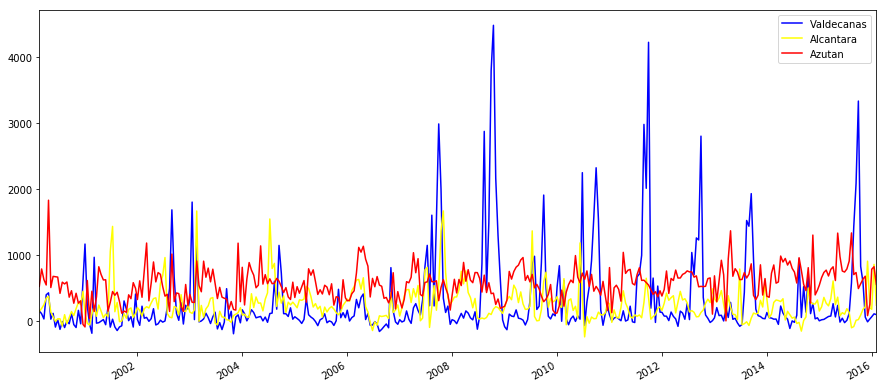

In [21]:
Mean[['Valdecanas', 'Alcantara', 'Azutan']].plot(figsize = (15,7), linewidth=1.5, color = ['blue', 'yellow', 'red', 'green', 'cyan', 'grey', 'orange', 'purple']);

# Comparativa del EVI para el periodo 2000-2007 en los 3 embalses del Tajo

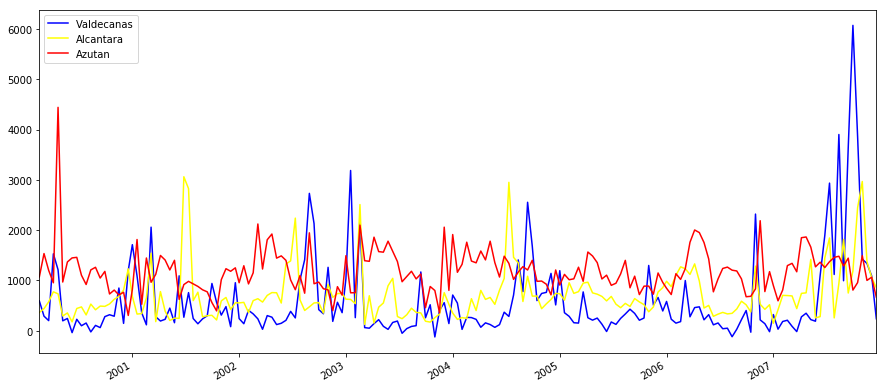

In [57]:
Per90[['Valdecanas', 'Alcantara', 'Azutan']]['2000':'2007'].plot(figsize = (15,7), linewidth=1.5, color = ['blue', 'yellow', 'red', 'green', 'cyan', 'grey', 'orange', 'purple']);

# Comparativa del EVI para el periodo 2007-2016 en los 3 embalses del Tajo

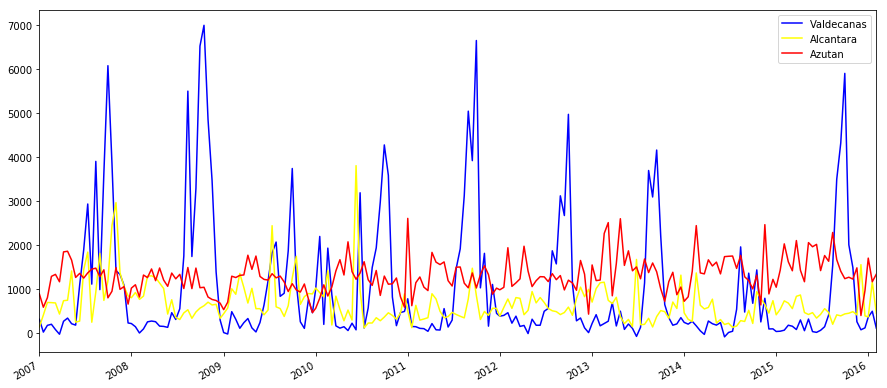

In [56]:
Per90[['Valdecanas', 'Alcantara', 'Azutan']]['2007':'2016'].plot(figsize = (15,7), linewidth=1.5, color = ['blue', 'yellow', 'red', 'green', 'cyan', 'grey', 'orange', 'purple']);

In [26]:
Mean['2007':'2016'].corr()

,Alcantara,Azutan,Cijara,GabrielyGalan,Navalcan,Rosarito,SantaTeresa,Valdecanas
Alcantara,1.000000,-0.006722,0.053201,0.197742,0.226381,-0.044353,0.179128,-0.028309
Azutan,-0.006722,1.000000,0.066475,0.079993,-0.067925,-0.206470,0.124035,-0.098497
Cijara,0.053201,0.066475,1.000000,0.081750,0.069123,-0.016470,0.045214,-0.013886
GabrielyGalan,0.197742,0.079993,0.081750,1.000000,0.283285,0.366703,0.322744,0.019869
Navalcan,0.226381,-0.067925,0.069123,0.283285,1.000000,0.207772,0.090521,0.138131
Rosarito,-0.044353,-0.206470,-0.016470,0.366703,0.207772,1.000000,-0.005152,0.422687
SantaTeresa,0.179128,0.124035,0.045214,0.322744,0.090521,-0.005152,1.000000,-0.215208
Valdecanas,-0.028309,-0.098497,-0.013886,0.019869,0.138131,0.422687,-0.215208,1.000000


In [358]:
import pandas as pd  
import numpy as np

datesss = pd.date_range('18/2/2000', periods=368, freq='384h0min')
df = pd.DataFrame(np.random.randn(368, 1), index=datesss, columns=['A'])

In [ ]:
plot = Median.plot(figsize = (15, 8))
fig = plot.get_figure()
fig.savefig(r"E:\MODIS\Median.png")

# Correlation

In [3]:
from scipy.stats import pearsonr

In [14]:
pearsonr(Alcantara['20000101':'20070815']['median'], Valdecanas['20000101':'20070815']['median'])

(0.16043180591705153, 0.034985109942620655)

In [15]:
Valdecanas.corr()

,max,mean,median,min,per10,per90
max,1.000000,0.789306,0.729268,0.126460,0.479355,0.826385
mean,0.789306,1.000000,0.984917,0.371653,0.823285,0.972268
median,0.729268,0.984917,1.000000,0.404471,0.849897,0.927816
min,0.126460,0.371653,0.404471,1.000000,0.618388,0.253893
per10,0.479355,0.823285,0.849897,0.618388,1.000000,0.695782
per90,0.826385,0.972268,0.927816,0.253893,0.695782,1.000000


# Análisis de picos

In [27]:
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline

El número de picos y su valor medio ANTES  de 2007 es de:
9 2185.66666667
El número de picos y su valor medio DESPUÉS a 2007 es de:
23 3685.97391304


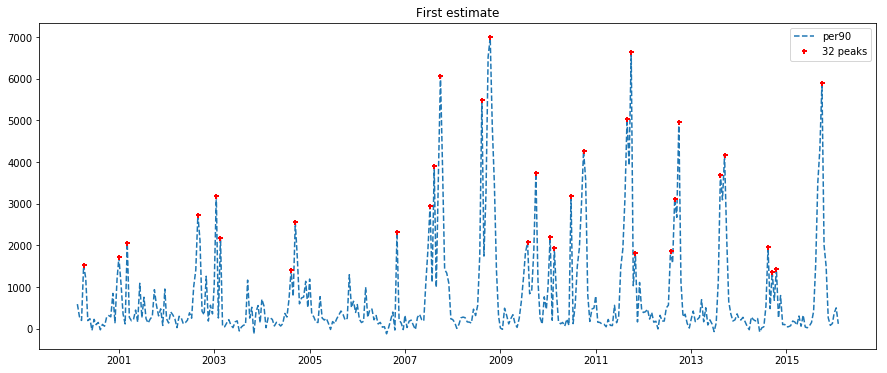

In [204]:
import pandas as pd
from pandas.tslib import Timestamp
from IPython.core.display import HTML
   
indexes = peakutils.indexes(Valdecanas['per90'], thres=0.20, min_dist=0)
#print(indexes)
picos = Valdecanas['dates'][indexes], Valdecanas['per90'][indexes]

d = {}

dates = [e for e in picos[0]]
values = [e for e in picos[1]]
for i in range(len(dates)):
    d[dates[i]] = values[i]
#for k, v in sorted(d.items()):
    #print(k, v)
    
d2007 = {}
d2016 = {}

for k, v in d.items():
    if k < Timestamp(2007, 1, 1):
        d2007[k] = v
        
for k, v in d.items():
    if k >= Timestamp(2007, 1, 1):
        d2016[k] = v

display(HTML('<h2><font color=blue>PERCENTIL 90</font></h2>'))

print('El número de picos y su valor medio ANTES  de 2007 es de:')
print(len(d2007), sum([i for i in d2007.values()])/len([i for i in d2007.values()]))

print('El número de picos y su valor medio DESPUÉS a 2007 es de:')
print(len(d2016), sum([i for i in d2016.values()])/len([i for i in d2016.values()]))

pyplot.figure(figsize=(15,6))
pplot(Valdecanas['dates'], Valdecanas['per90'], indexes)
pyplot.title('First estimate');

El número total de picos y su valor medio es de:
57 4875.03508772
El número de picos y su valor medio ANTES  de 2007 es de:
24 4055.25
El número de picos y su valor medio DESPUÉS a 2007 es de:
33 5471.24242424


El número total de picos y su valor medio es de:
22 2117.52044764
El número de picos y su valor medio ANTES  de 2007 es de:
5 1404.32279635
El número de picos y su valor medio DESPUÉS a 2007 es de:
17 2327.28446272


El número total de picos y su valor medio es de:
20 2045.4
El número de picos y su valor medio ANTES  de 2007 es de:
6 1339.83333333
El número de picos y su valor medio DESPUÉS a 2007 es de:
14 2347.78571429


El número total de picos y su valor medio es de:
28 3525.30714286
El número de picos y su valor medio ANTES  de 2007 es de:
7 2390.94285714
El número de picos y su valor medio DESPUÉS a 2007 es de:
21 3903.42857143


El número total de picos y su valor medio es de:
109 -93.2385321101
El número de picos y su valor medio ANTES  de 2007 es de:
51 -168.568627451
El número de picos y su valor medio DESPUÉS a 2007 es de:
58 -27.0


El número total de picos y su valor medio es de:
15 977.813333333
El número de picos y su valor medio ANTES  de 2007 es de:
4 630.15
El número de picos y su valor medio DESPUÉS a 2007 es de:
11 1104.23636364


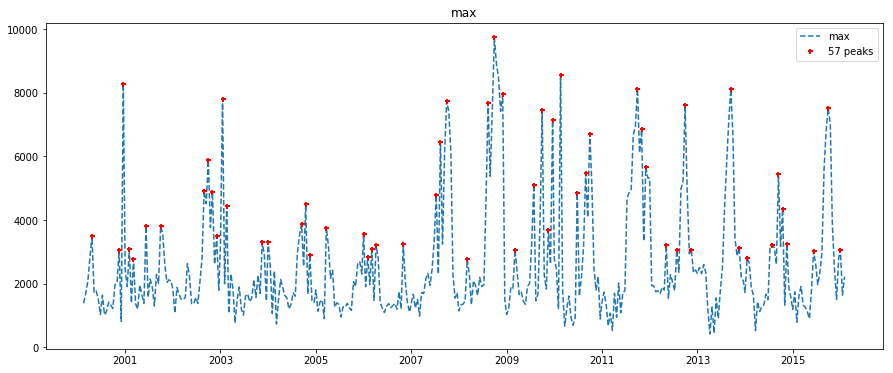

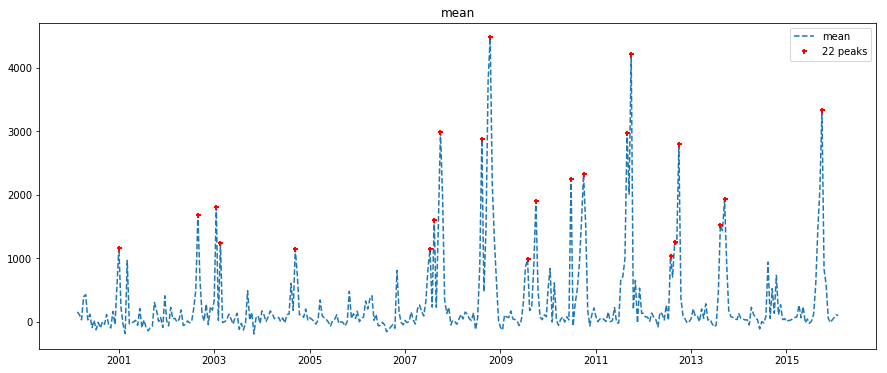

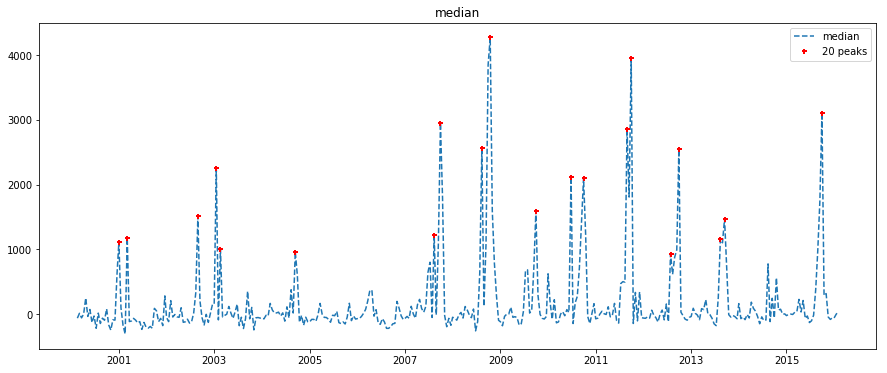

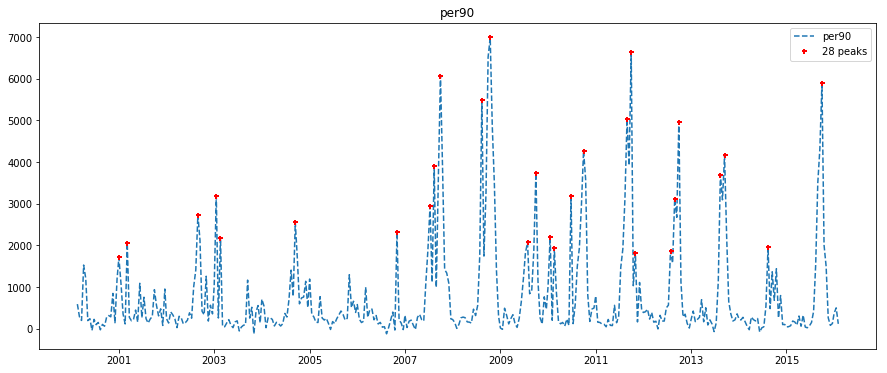

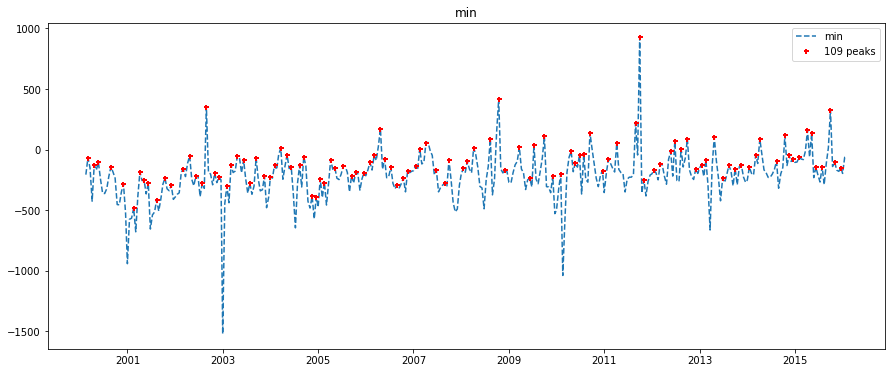

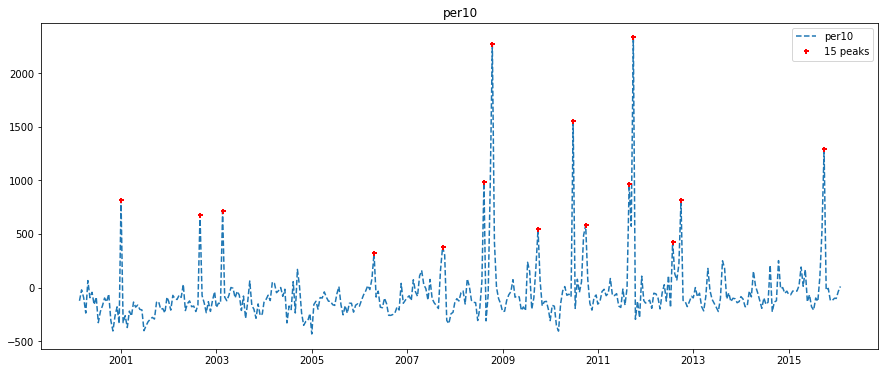

In [261]:
import pandas as pd
from pandas.tslib import Timestamp
from IPython.core.display import HTML

display(HTML("<h1><font color=red><b>VALDECAÑAS</b></font></h1>"))

stats = ['max', 'mean', 'median', 'per90', 'min', 'per10']

for s in stats:
    
    indexes = peakutils.indexes(Valdecanas[s], thres=0.25, min_dist=1)
    #print(indexes)
    picos = Valdecanas['dates'][indexes], Valdecanas[s][indexes]

    d = {}

    dates = [e for e in picos[0]]
    values = [e for e in picos[1]]
    for i in range(len(dates)):
        d[dates[i]] = values[i]
    #for k, v in sorted(d.items()):
        #print(k, v)

    d2007 = {}
    d2016 = {}

    for k, v in d.items():
        if k < Timestamp(2007, 1, 1):
            d2007[k] = v

    for k, v in d.items():
        if k >= Timestamp(2007, 1, 1):
            d2016[k] = v
   
    display(HTML("<h2><b>" + str(s) + "</b></h2>"))
    
    print('El número total de picos y su valor medio es de:')
    print(len(d), sum([i for i in d.values()])/len([i for i in d.values()]))

    print('El número de picos y su valor medio ANTES  de 2007 es de:')
    print(len(d2007), sum([i for i in d2007.values()])/len([i for i in d2007.values()]))

    print('El número de picos y su valor medio DESPUÉS a 2007 es de:')
    print(len(d2016), sum([i for i in d2016.values()])/len([i for i in d2016.values()]))

    pyplot.figure(figsize=(15,6))
    pplot(Valdecanas['dates'], Valdecanas[s], indexes)
    pyplot.title(str(s));

El número total de picos y su valor medio es de:
47 2761.74468085
El número de picos y su valor medio ANTES  de 2007 es de:
18 2776.38888889
El número de picos y su valor medio DESPUÉS a 2007 es de:
29 2752.65517241


El número total de picos y su valor medio es de:
66 886.21969697
El número de picos y su valor medio ANTES  de 2007 es de:
21 946.956709957
El número de picos y su valor medio DESPUÉS a 2007 es de:
45 857.875757576


El número total de picos y su valor medio es de:
91 774.197802198
El número de picos y su valor medio ANTES  de 2007 es de:
38 769.302631579
El número de picos y su valor medio DESPUÉS a 2007 es de:
53 777.70754717


El número total de picos y su valor medio es de:
18 2338.62777778
El número de picos y su valor medio ANTES  de 2007 es de:
6 2484.36666667
El número de picos y su valor medio DESPUÉS a 2007 es de:
12 2265.75833333


El número total de picos y su valor medio es de:
108 101.472222222
El número de picos y su valor medio ANTES  de 2007 es de:
45 80.8222222222
El número de picos y su valor medio DESPUÉS a 2007 es de:
63 116.222222222


El número total de picos y su valor medio es de:
108 166.709259259
El número de picos y su valor medio ANTES  de 2007 es de:
45 128.611111111
El número de picos y su valor medio DESPUÉS a 2007 es de:
63 193.922222222


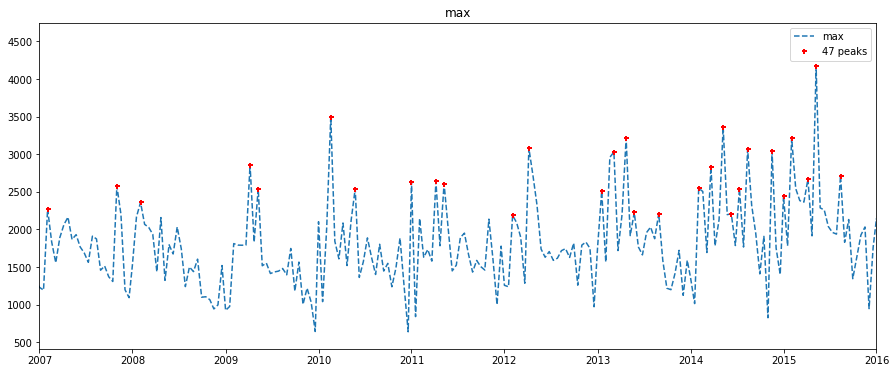

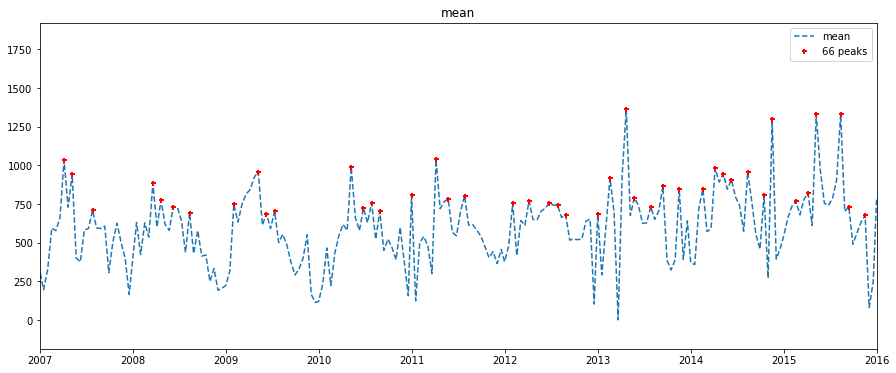

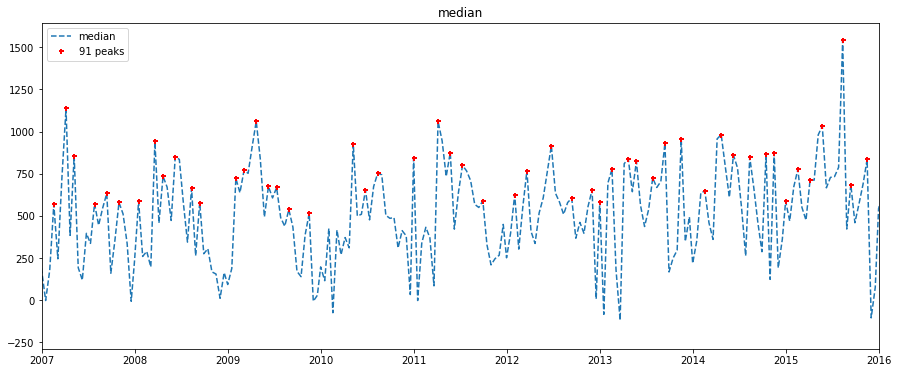

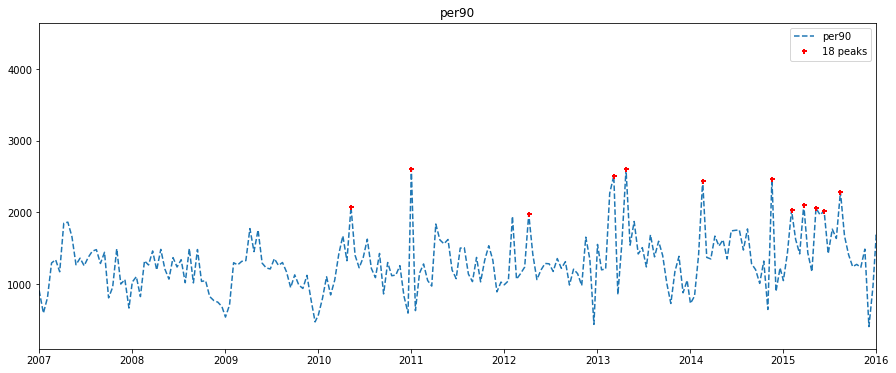

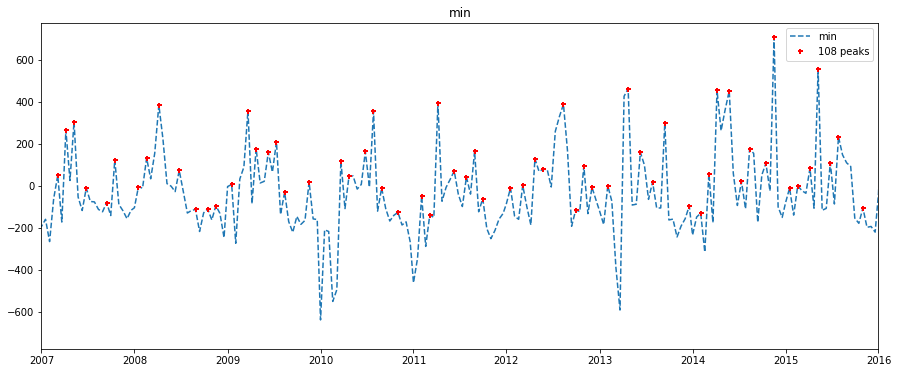

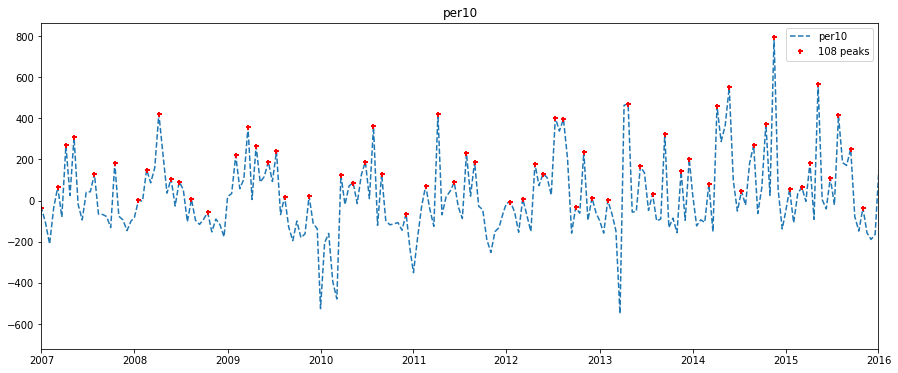

In [259]:
import pandas as pd
from pandas.tslib import Timestamp
from IPython.core.display import HTML

display(HTML("<h1><font color=red><b>AZUTAN</b></font></h1>"))

stats = ['max', 'mean', 'median', 'per90', 'min', 'per10']

for s in stats:
    
    indexes = peakutils.indexes(Azutan[s], thres=0.4, min_dist=1)
    #print(indexes)
    picos = Azutan['dates'][indexes], Azutan[s][indexes]

    d = {}

    dates = [e for e in picos[0]]
    values = [e for e in picos[1]]
    for i in range(len(dates)):
        d[dates[i]] = values[i]
    #for k, v in sorted(d.items()):
        #print(k, v)

    d2007 = {}
    d2016 = {}

    for k, v in d.items():
        if k < Timestamp(2007, 1, 1):
            d2007[k] = v

    for k, v in d.items():
        if k >= Timestamp(2007, 1, 1):
            d2016[k] = v
   
    display(HTML("<h2><b>" + str(s) + "</b></h2>"))
    
    print('El número total de picos y su valor medio es de:')
    print(len(d), sum([i for i in d.values()])/len([i for i in d.values()]))
    
    print('El número de picos y su valor medio ANTES  de 2007 es de:')
    print(len(d2007), sum([i for i in d2007.values()])/len([i for i in d2007.values()]))

    print('El número de picos y su valor medio DESPUÉS a 2007 es de:')
    print(len(d2016), sum([i for i in d2016.values()])/len([i for i in d2016.values()]))

    pyplot.figure(figsize=(15,6))
    #pyplot.ylim((0,10000))
    pyplot.xlim((Timestamp(2007, 1, 1),Timestamp(2016, 1, 1)))
    pplot(Azutan['dates'], Azutan[s], indexes)
    pyplot.title(str(s));
   

El número total de picos y su valor medio es de:
16 4365.3125
El número de picos y su valor medio ANTES  de 2007 es de:
6 4182.16666667
El número de picos y su valor medio DESPUÉS a 2007 es de:
10 4475.2


El número total de picos y su valor medio es de:
25 886.622736842
El número de picos y su valor medio ANTES  de 2007 es de:
8 1034.04078947
El número de picos y su valor medio DESPUÉS a 2007 es de:
17 817.249535604


El número total de picos y su valor medio es de:
18 849.944444444
El número de picos y su valor medio ANTES  de 2007 es de:
7 946.571428571
El número de picos y su valor medio DESPUÉS a 2007 es de:
11 788.454545455


El número total de picos y su valor medio es de:
11 2459.27272727
El número de picos y su valor medio ANTES  de 2007 es de:
4 2689.15
El número de picos y su valor medio DESPUÉS a 2007 es de:
7 2327.91428571


El número total de picos y su valor medio es de:
96 12.9791666667
El número de picos y su valor medio ANTES  de 2007 es de:
40 -14.4
El número de picos y su valor medio DESPUÉS a 2007 es de:
56 32.5357142857


El número total de picos y su valor medio es de:
37 279.918918919
El número de picos y su valor medio ANTES  de 2007 es de:
11 346.272727273
El número de picos y su valor medio DESPUÉS a 2007 es de:
26 251.846153846


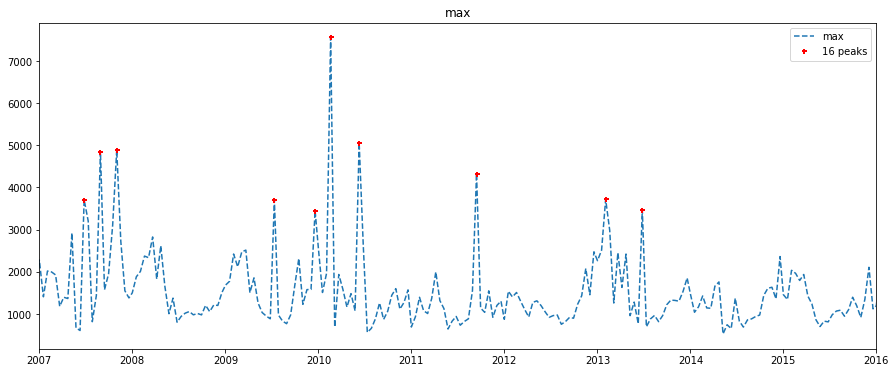

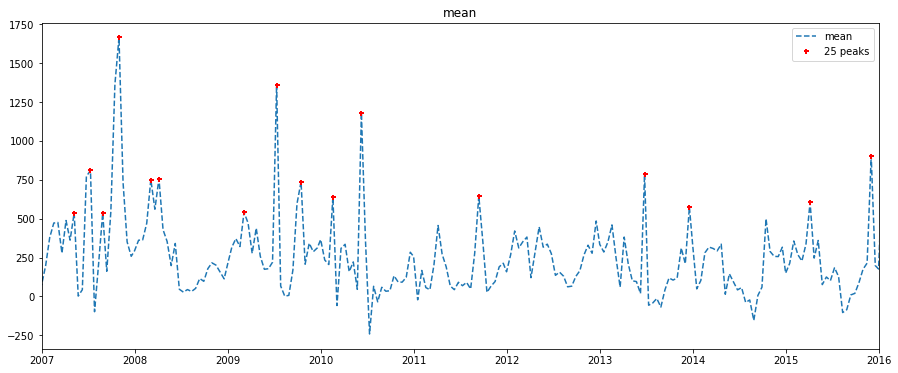

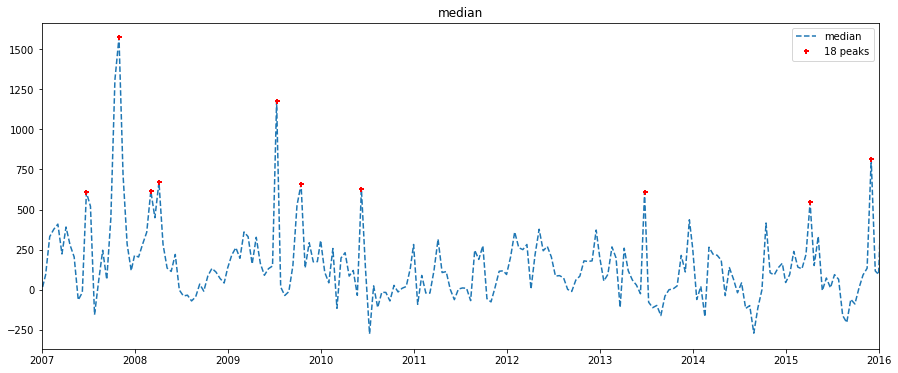

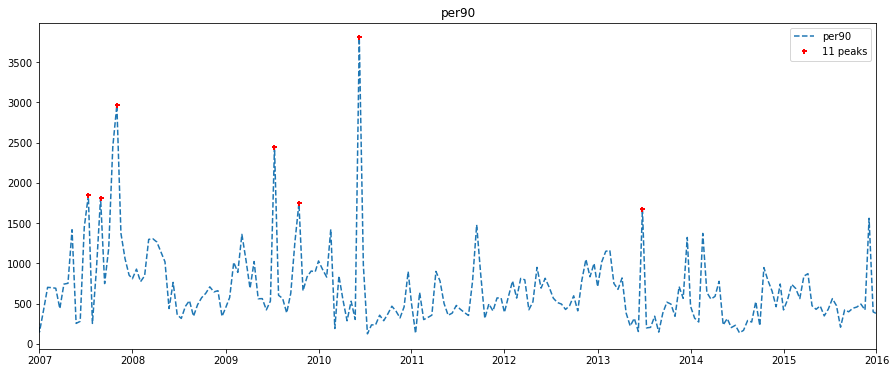

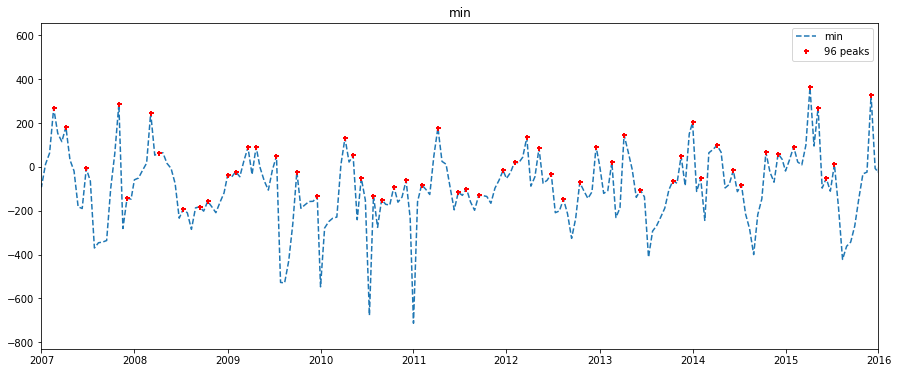

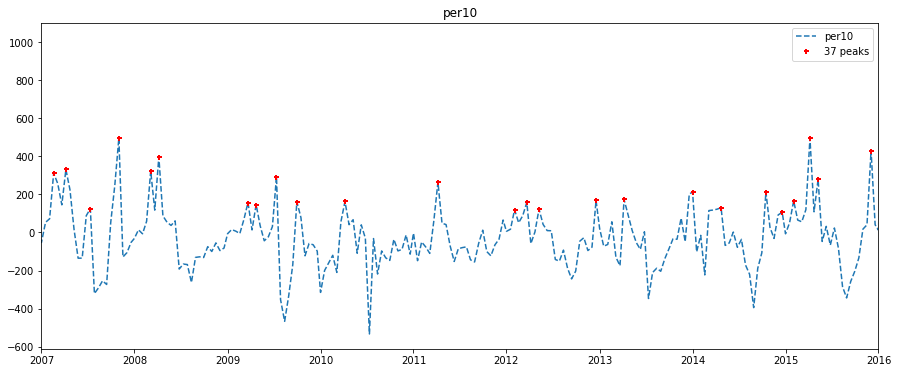

In [258]:
import pandas as pd
from pandas.tslib import Timestamp
from IPython.core.display import HTML

display(HTML("<h1><font color=red><b>ALCANTARA</b></font></h1>"))

stats = ['max', 'mean', 'median', 'per90', 'min', 'per10']

for s in stats:
    
    indexes = peakutils.indexes(Alcantara[s], thres=0.4, min_dist=1)
    #print(indexes)
    picos = Alcantara['dates'][indexes], Alcantara[s][indexes]

    d = {}

    dates = [e for e in picos[0]]
    values = [e for e in picos[1]]
    for i in range(len(dates)):
        d[dates[i]] = values[i]
    #for k, v in sorted(d.items()):
        #print(k, v)

    d2007 = {}
    d2016 = {}

    for k, v in d.items():
        if k < Timestamp(2007, 1, 1):
            d2007[k] = v

    for k, v in d.items():
        if k >= Timestamp(2007, 1, 1):
            d2016[k] = v
   
    display(HTML("<h2><b>" + str(s) + "</b></h2>"))
    
    print('El número total de picos y su valor medio es de:')
    print(len(d), sum([i for i in d.values()])/len([i for i in d.values()]))
    
    print('El número de picos y su valor medio ANTES  de 2007 es de:')
    print(len(d2007), sum([i for i in d2007.values()])/len([i for i in d2007.values()]))

    print('El número de picos y su valor medio DESPUÉS a 2007 es de:')
    print(len(d2016), sum([i for i in d2016.values()])/len([i for i in d2016.values()]))

    pyplot.figure(figsize=(15,6))
    #pyplot.ylim((0,10000))
    pyplot.xlim((Timestamp(2007, 1, 1),Timestamp(2016, 1, 1)))
    pplot(Alcantara['dates'], Alcantara[s], indexes)
    pyplot.title(str(s));